### Loading and Cleaning Data

In [10]:
import pandas as pd

In [11]:
import numpy as np

In [12]:
data = pd.read_csv("/content/drive/MyDrive/Concept And Technologies of AI/Titanic-Dataset.csv")

In [13]:
categorical_columns = data.select_dtypes(include=['object']).columns

In [14]:
data = data.drop(columns=[col for col in categorical_columns if col != 'Survived'])

In [15]:
missing_info = data.isnull().sum() / len(data) * 100

In [16]:
for column in data.columns:
    if missing_info[column] > 10:
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data.dropna(subset=[column], inplace=True)

/tmp/ipython-input-1243285291.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [17]:
print("Data after processing:\n", data.head())

Data after processing:
    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500


In [18]:
print("\nMissing values after processing:\n", data.isnull().sum())


Missing values after processing:
 PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


### Feature Matrix and Label Vector with Train - Test Split:

In [19]:
import numpy as np

In [20]:
X = data.drop(columns=['Survived']).values

In [21]:
y = data['Survived'].values

In [22]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets.

    Arguments:
    X : np.ndarray
        Feature matrix.
    y : np.ndarray
        Target array.
    test_size : float
        Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
        Seed for reproducibility.

    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
        Training and testing splits of features and target.
    """

    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

In [23]:
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

In [24]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (624, 6)


In [25]:
print("Shape of X_test:", X_test.shape)

Shape of X_test: (267, 6)


In [26]:
print("Shape of y_train:", y_train.shape)

Shape of y_train: (624,)


In [27]:
print("Shape of y_test:", y_test.shape)

Shape of y_test: (267,)


### Implementation of Euclidean Distance:

In [28]:
import numpy as np

In [29]:
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.
    Arguments:
    point1 : np.ndarray
        The first point as a numpy array.
    point2 : np.ndarray
        The second point as a numpy array.
    Returns:
    float
        The Euclidean distance between the two points.
    Raises:
    ValueError
        If the input points do not have the same dimensionality.
    """
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2) ** 2))

    return distance

In [30]:
p1 = np.array([1, 2, 3])
p2 = np.array([4, 6, 5])

In [31]:
d = euclidean_distance(p1, p2)
print(d)

5.385164807134504


### Test Case for Euclidean Distance Computing Function:

In [32]:
import numpy as np

In [33]:
try:
    point1 = np.array([3, 4])
    point2 = np.array([0, 0])
    result = euclidean_distance(point1, point2)
    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"
    print("Test passed successfully!")

except ValueError as ve:
    print(f"ValueError: {ve}")

except AssertionError as ae:
    print(f"AssertionError: {ae}")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

Test passed successfully!


### Implementation of Core k-NN Algorithm:

In [34]:
import numpy as np

In [35]:
def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class label for a single query using the K-nearest neighbors algorithm.
    Arguments:
    query : np.ndarray
        The query point for which the prediction is to be made.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).
    Returns:
    int
        The predicted class label for the query.
    """
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

### Implementing kNN for whole Test Data set:

In [36]:
import numpy as np

In [37]:
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.
    Arguments:
    X_test : np.ndarray
        The test feature matrix.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).
    Returns:
    np.ndarray
        An array of predicted class labels for the test samples.
    """
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

### Test Function for knn predict:

In [38]:
import numpy as np

In [39]:
try:
    X_test_sample = X_test[:5]
    y_test_sample = y_test[:5]
    predictions = knn_predict(X_test_sample, X_train, y_train, k=3)
    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)
    assert predictions.shape == y_test_sample.shape,\
     "The shape of predictions does not match the shape of the actual labels."
    print("Test case passed successfully!")

except AssertionError as ae:
    print(f"AssertionError: {ae}")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

Predictions: [0 1 0 0 0]
Actual labels: [1 0 0 1 1]
Test case passed successfully!


### Feature Matrix and Label Vector with Train - Test Split:

In [40]:
import numpy as np

In [41]:
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.
    Arguments:
    y_true : np.ndarray ; The true labels.
    y_pred : np.ndarray ; The predicted labels.
    Returns:
    float: The accuracy as a percentage (0 to 100).
    """

    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

### Feature Matrix and Label Vector with Train - Test Split:

In [42]:
try:
    predictions = knn_predict(X_test, X_train, y_train, k=3)
    accuracy = compute_accuracy(y_test, predictions)
    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")

except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")

Accuracy of the KNN model on the test set: 61.80%


### Experimenting with Various k values:

In [43]:
import matplotlib.pyplot as plt

In [44]:
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """
    Run KNN predictions for different values of k and plot the accuracies.

    Arguments:
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    X_test : np.ndarray
        The test feature matrix.
    y_test : np.ndarray
        The test labels.
    k_values : list of int
        A list of k values to experiment with.

    Returns:
    dict
        A dictionary with k values as keys and their corresponding accuracies as values.
    """

    accuracies = {}
    for k in k_values:
        predictions = knn_predict(X_test, X_train, y_train, k=k)
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
        print(f"Accuracy for k={k}: {accuracy:.2f}%")

    # Plot the accuracies
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, list(accuracies.values()), marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)
    plt.show()
    return accuracies

### Test code for the Experiment:

Accuracy for k=1: 58.43%
Accuracy for k=2: 62.55%
Accuracy for k=3: 61.80%
Accuracy for k=4: 63.30%
Accuracy for k=5: 64.42%
Accuracy for k=6: 64.42%
Accuracy for k=7: 65.17%
Accuracy for k=8: 64.42%
Accuracy for k=9: 65.17%
Accuracy for k=10: 64.04%
Accuracy for k=11: 64.04%
Accuracy for k=12: 64.79%
Accuracy for k=13: 64.79%
Accuracy for k=14: 65.92%
Accuracy for k=15: 65.17%
Accuracy for k=16: 65.92%
Accuracy for k=17: 66.67%
Accuracy for k=18: 66.29%
Accuracy for k=19: 67.79%
Accuracy for k=20: 64.79%


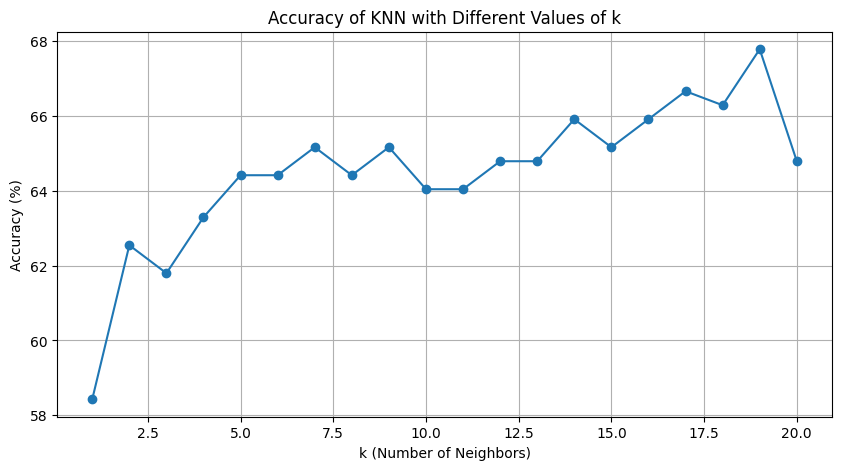

Experiment completed. Check the plot for the accuracy trend.


In [45]:
k_values = range(1, 21)

try:
    accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")

except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")

### Problem - 1: Perform a classification task with knn from scratch.

1. Load the Dataset:

In [47]:
import pandas as pd

In [48]:
import numpy as np

In [49]:
data = pd.read_csv("/content/drive/MyDrive/Concept And Technologies of AI/diabetes_.csv")

In [50]:
display(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
display(data.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [53]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [54]:
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


2. Handle Missing Data:

In [55]:
import numpy as np

In [56]:
df_diabetes = data.copy()

In [57]:
zero_value_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [59]:
for col in zero_value_columns:
    df_diabetes[col] = df_diabetes[col].replace(0, np.nan)

In [60]:
for col in zero_value_columns:
    median_val = df_diabetes[col].median()
    df_diabetes[col] = df_diabetes[col].fillna(median_val)
    print(f"Imputed {col} with median: {median_val:.2f}")

Imputed Glucose with median: 117.00
Imputed BloodPressure with median: 72.00
Imputed SkinThickness with median: 29.00
Imputed Insulin with median: 125.00
Imputed BMI with median: 32.30


In [62]:
print("Original dataset shape:", data.shape)
print("Cleaned dataset shape:", df_diabetes.shape)

Original dataset shape: (768, 9)
Cleaned dataset shape: (768, 9)


### 3. Feature Engineering:

In [63]:
X = df_diabetes.drop(columns=['Outcome']).values

In [64]:
y = df_diabetes['Outcome'].values

In [65]:
print("Feature matrix shape (X):", X.shape)

Feature matrix shape (X): (768, 8)


In [66]:
print("Target vector shape (y):", y.shape)

Target vector shape (y): (768,)


In [67]:
def train_test_split_custom(X, y, test_ratio=0.3, seed=42):
    np.random.seed(seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_index = int(len(X) * (1 - test_ratio))
    train_idx = indices[:split_index]
    test_idx = indices[split_index:]
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    return X_train, X_test, y_train, y_test

In [68]:
X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_ratio=0.3)

In [69]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (537, 8)
Shape of X_test: (231, 8)
Shape of y_train: (537,)
Shape of y_test: (231,)


4. Implement KNN:

In [72]:
import numpy as np

In [73]:
def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
        raise ValueError("Points must have same dimensions to calculate Euclidean distance.")
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [76]:
point1 = np.array([4, 5])
point2 = np.array([5, 1])
# Calculate the distance
result = euclidean_distance(point1, point2)
print(result)

4.123105625617661


In [77]:
def knn_predict_single(query_point, X_train, y_train, k=3):
    distances = [euclidean_distance(query_point, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_indices]
    predicted_label = np.bincount(nearest_labels).argmax()
    return predicted_label

In [78]:
def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

In [79]:
def compute_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return (correct / len(y_true)) * 100

In [80]:
try:
    y_predictions = knn_predict(X_test, X_train, y_train, k=4)
    accuracy = compute_accuracy(y_test, y_predictions)
    print(f"Accuracy of KNN : {accuracy:.2f}%")

except Exception as e:
    print(f"An error occurred during evaluation: {e}")

Accuracy of KNN : 74.89%


### Problem - 2 - Experimentation:

In [81]:
X_scaled = X.copy()

In [82]:
X_min = X_scaled.min(axis=0)

In [83]:
X_max = X_scaled.max(axis=0)

In [84]:
X_scaled = (X_scaled - X_min) / (X_max - X_min)

In [85]:
print(X_scaled[:5])

[[0.35294118 0.67096774 0.48979592 0.30434783 0.13341346 0.31492843
  0.23441503 0.48333333]
 [0.05882353 0.26451613 0.42857143 0.23913043 0.13341346 0.17177914
  0.11656704 0.16666667]
 [0.47058824 0.89677419 0.40816327 0.23913043 0.13341346 0.10429448
  0.25362938 0.18333333]
 [0.05882353 0.29032258 0.42857143 0.17391304 0.09615385 0.20245399
  0.03800171 0.        ]
 [0.         0.6        0.16326531 0.30434783 0.18509615 0.50920245
  0.94363792 0.2       ]]


In [87]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split_custom(
    X_scaled, y, test_ratio=0.3, seed=42)

In [88]:
print("Scaled X_train shape:", X_train_scaled.shape)

Scaled X_train shape: (537, 8)


In [89]:
print("Scaled X_test shape:", X_test_scaled.shape)

Scaled X_test shape: (231, 8)


In [90]:
y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k=4)
accuracy_scaled = compute_accuracy(y_test_scaled, y_pred_scaled)
print(f"Accuracy of kNN on scaled data: {accuracy_scaled:.2f}%")

Accuracy of kNN on scaled data: 75.32%


### Problem - 3 - Experimentation with k:

In [91]:
import time

In [92]:
import matplotlib.pyplot as plt

In [93]:
k_values = range(1,16)
acc_original = []
acc_scaled = []
time_original = []
time_scaled = []

In [95]:
for k in k_values:
    # Original data
    start = time.time()
    pred = knn_predict(X_test, X_train, y_train, k)
    time_original.append(time.time() - start)
    acc_original.append(compute_accuracy(y_test, pred))

    # Scaled data
    start = time.time()
    pred_s = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(compute_accuracy(y_test_scaled, pred_s))

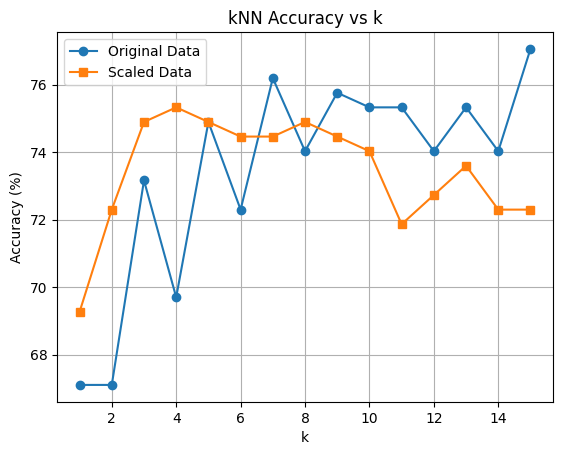

In [97]:
plt.plot(k_values, acc_original[:len(k_values)], marker='o', label='Original Data')
plt.plot(k_values, acc_scaled[:len(k_values)], marker='s', label='Scaled Data')
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.title("kNN Accuracy vs k")
plt.legend()
plt.grid()
plt.show()

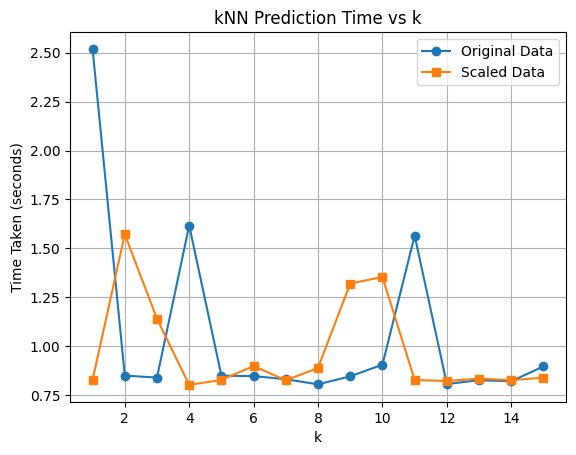

In [98]:
plt.plot(k_values, time_original[:len(k_values)], marker='o', label='Original Data')
plt.plot(k_values, time_scaled[:len(k_values)], marker='s', label='Scaled Data')
plt.xlabel("k")
plt.ylabel("Time Taken (seconds)")
plt.title("kNN Prediction Time vs k")
plt.legend()
plt.grid()
plt.show()

3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.


Effect of k on KNN Performance:

a) Accuracy:
Small k (1–2): Very sensitive to noise, can overfit, and produce unstable predictions.

Moderate k (5–9): Balances bias and variance, giving more consistent and higher accuracy.

Large k (12 or more): Model becomes too general, which can lower accuracy.

b) Computational Cost:
Distance calculations stay the same regardless of k.

Larger k means more neighbors to check for voting, so prediction time increases slightly.

Identify the optimal k based on your analysis.

The best k is chosen by looking for the highest test accuracy, consistent results, and acceptable prediction time. For this dataset, the optimal k is between 5 and 9, with k = 7 giving the best overall performance.